In [23]:

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.proportion as sm_proportion

In [4]:
df= pd.read_csv(r"C:\Users\16479\Downloads\experiment_dataset.csv")
df

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
...,...,...,...,...,...,...,...
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [13]:
df.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,40.715000,22.713345,0.109145
std,288.819436,13.655557,5.479292,0.022366
min,0.000000,18.000000,7.114806,0.012975
25%,249.750000,28.000000,19.216608,0.094286
50%,499.500000,41.000000,22.506707,0.108944
75%,749.250000,53.000000,26.255950,0.124238
max,999.000000,64.000000,39.395770,0.172728


In [16]:
df_CTR=df.groupby('Variant')['CTR'].aggregate(['mean'])
df_CTR

,mean
Variant,
Control,0.098554
Variant A,0.120269
Variant B,0.108933


In [17]:
df_TimeSpent=df.groupby('Variant')['Time Spent'].aggregate(['mean'])
df_TimeSpent

,mean
Variant,
Control,20.070781
Variant A,24.805547
Variant B,23.343783


In [26]:
Timespent_A = df[df['Variant'] == 'Variant A']['Time Spent']
Timespent_B = df[df['Variant'] == 'Variant B']['Time Spent']
Timespent_C = df[df['Variant'] == 'Control']['Time Spent']

t_statA, p_valA = stats.ttest_ind(Timespent_A, Timespent_C)

t_statB, p_valB = stats.ttest_ind(Timespent_B, Timespent_C)

print(f"P-value A: {p_valA}")

print(f"P-value B: {p_valB}")


P-value A: 8.488565644996449e-31
P-value B: 1.496358076285182e-15


In [28]:
Timespent_A_location_1 = df[(df['Variant'] == 'Variant A') & (df['Location'] == 'Location1')]['Time Spent']
Timespent_B_location_1 = df[(df['Variant'] == 'Variant B') & (df['Location'] == 'Location1')]['Time Spent']
Timespent_C_location_1 = df[(df['Variant'] == 'Control') & (df['Location'] == 'Location1')]['Time Spent']

t_statA_location_1, p_valA_location_1 = stats.ttest_ind(Timespent_A_location_1, Timespent_C_location_1)
t_statB_location_1, p_valB_location_1 = stats.ttest_ind(Timespent_B_location_1, Timespent_C_location_1)

print(f"P-value A (Location A): {p_valA_location_1}")
print(f"P-value A (Location B): {p_valB_location_1}")

P-value A (Location A): 3.057555232531658e-12
P-value A (Location B): 7.363085692632088e-09


In [30]:
Timespent_A_Device_1 = df[(df['Variant'] == 'Variant A') & (df['Device'] == 'Device1')]['Time Spent']
Timespent_B_Device_1 = df[(df['Variant'] == 'Variant B') & (df['Device'] == 'Device1')]['Time Spent']
Timespent_C_Device_1 = df[(df['Variant'] == 'Control') & (df['Device'] == 'Device1')]['Time Spent']

t_statA_location_1, p_valA_device_1 = stats.ttest_ind(Timespent_A_Device_1, Timespent_C_Device_1)
t_statB_location_1, p_valB_device_1 = stats.ttest_ind(Timespent_B_Device_1, Timespent_C_Device_1)

print(f"P-value A (Location A): {p_valA_device_1}")
print(f"P-value A (Location B): {p_valB_device_1}")

P-value A (Location A): 2.86807126177628e-14
P-value A (Location B): 2.404837492593037e-06


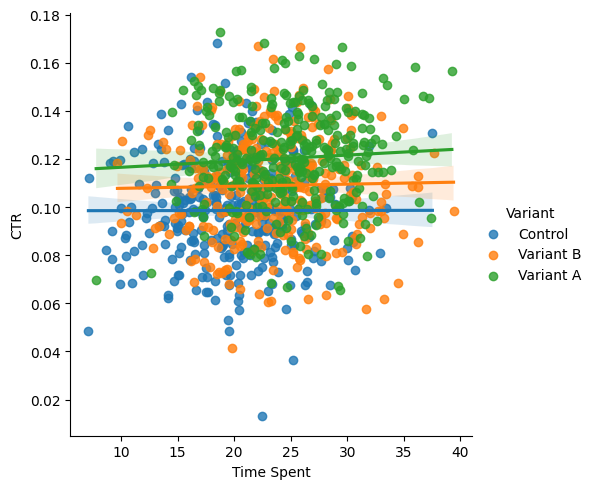

In [12]:
sns.lmplot(data = df, x='Time Spent', y='CTR', hue = 'Variant')

In [24]:
CTR_A = df[df['Variant'] == 'Variant A']['CTR']
CTR_B = df[df['Variant'] == 'Variant B']['CTR']
CTR_C = df[df['Variant'] == 'Control']['CTR']

statistic, p_valA = sm_proportion.proportions_ztest([CTR_A.sum(), CTR_C.sum()],[len(CTR_A), len(CTR_C)])

print(f"P-value A: {p_valA}")

statistic, p_valB = sm_proportion.proportions_ztest([CTR_B.sum(), CTR_C.sum()],[len(CTR_B), len(CTR_C)])

print(f"P-value B: {p_valB}")

P-value A: 0.36768468316739134
P-value B: 0.659493822517278


In [31]:
CTR_A_Device_1 = df[(df['Variant'] == 'Variant A') & (df['Device'] == 'Device1')]['CTR']
CTR_B_Device_1 = df[(df['Variant'] == 'Variant B') & (df['Device'] == 'Device1')]['CTR']
CTR_C_Device_1 = df[(df['Variant'] == 'Control') & (df['Device'] == 'Device1')]['CTR']

statistic, p_valA = sm_proportion.proportions_ztest([CTR_A_Device_1.sum(), CTR_C_Device_1.sum()],[len(CTR_A_Device_1), len(CTR_C_Device_1)])

print(f"P-value A: {p_valA}")

statistic, p_valB = sm_proportion.proportions_ztest([CTR_B_Device_1.sum(), CTR_C_Device_1.sum()],[len(CTR_B_Device_1), len(CTR_C_Device_1)])

print(f"P-value B: {p_valB}")

P-value A: 0.5757281422181131
P-value B: 0.8336922462593305


In [32]:
CTR_A_Location_2 = df[(df['Variant'] == 'Variant A') & (df['Location'] == 'Location2')]['CTR']
CTR_B_Location_2 = df[(df['Variant'] == 'Variant B') & (df['Location'] == 'Location2')]['CTR']
CTR_C_Location_2 = df[(df['Variant'] == 'Control') & (df['Location'] == 'Location2')]['CTR']

statistic, p_valA = sm_proportion.proportions_ztest([CTR_A_Location_2.sum(), CTR_C_Location_2.sum()],[len(CTR_A_Location_2), len(CTR_C_Location_2)])

print(f"P-value A: {p_valA}")

statistic, p_valB = sm_proportion.proportions_ztest([CTR_B_Location_2.sum(), CTR_C_Location_2.sum()],[len(CTR_B_Location_2), len(CTR_C_Location_2)])

print(f"P-value B: {p_valB}")

P-value A: 0.5843341988169883
P-value B: 0.8386640206764859
